<table align="right" width=100%>
    <tr><b></b>
        <td width="25%">
            <img src="https://th.bing.com/th/id/OIP.1lf7rizd_C5U1_ieDXAF2gHaEO?w=319&h=181&c=7&r=0&o=5&dpr=1.1&pid=1.7">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=5px>
                  <b>Beijing Multisite Air Quality Machine Learing Model's</b>
                </font>
            </div>
        </td>  
    </tr>
</table>

## Exploring Air Pollutants in Beijing
### Context
PM2.5 readings are often included in air quality reports from environmental authorities and companies. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution.

### Content
This data set includes  air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. <br/>
The time period is from March 1st, 2013 to February 28th, 2017.

### Acknowledgements
Zhang, S., Guo, B., Dong, A., He, J., Xu, Z. and Chen, S.X. (2017) Cautionary Tales on Air-Quality Improvement in Beijing. Proceedings of the Royal Society A, Volume 473, No. 2205, Pages 20170457.

The files were downloaded from the UCI Machine Learning Repository and have not been modified.<br/>
https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data

### Problem Statement:

The pollutant that affects people the most is particulate matter, usually abbreviated as PM and used as a measure of air pollution. Although particles with a diameter of 10 microns or less (≤PM10) can penetrate and embed deep in the lungs, the ones that are more harmful to health are those with a diameter of 2.5 microns or less (≤PM2.5).

## Importing the Required Libraries

In [ ]:
#Read system file path of data set to load the path
import os

# import 'Numpy' 
import numpy as np # linear algebra
# import 'Pandas' 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels 
import statsmodels.api as sm
import statsmodels.stats.api as stats
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import glob
%matplotlib inline
plt.rcParams['figure.figsize'] = (25, 25)
from datetime import datetime, timedelta


# import various functions from scipy
import scipy as sci
from scipy import stats as scistats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#### DATA SET DETAILS:
=======================================================================<br/>
**1. No:** 		Row number                              <br/>
**2. year:** 	Year of data in this row                <br/>
**3. month:** 	Month of data in this row               <br/>
**4. day:** 	Day of data in this row                 <br/>
**5. hour:** 	Hour of data in this row                <br/>
**6. PM2.5:** 	PM2.5 concentration (ug/m^3)            <br/>
**7. PM10:** 	PM10 concentration (ug/m^3)             <br/>
**8. SO2:** 	SO2 concentration (ug/m^3)              <br/>
**9. NO2:** 	NO2 concentration (ug/m^3)              <br/>
**10. CO:** 	CO concentration (ug/m^3)           	<br/>
**11. O3:** 	O3 concentration (ug/m^3)           	<br/>
**12. TEMP:** 	Temperature (degree Celsius)            <br/>
**13. PRES:** 	Pressure (hPa)                          <br/>
**14. DEWP:** 	Dew point temperature (degree Celsius)  <br/>
**15. RAIN:** 	Precipitation (mm)                      <br/>
**16. wd:** 		Wind direction                      <br/>
**17. WSPM:** 	Wind speed (m/s)                        <br/>
**18. station:**	Name of the air-quality monitoring site <br/>

==========================================================================

### The process followed is highlighted below:

**1. Data Cleaning** - Noise detection and removal<br/>
**2. Subjective analysis** - Using our intuition to evaluate a data variable/feature and 
        decide whether a variable influences the popularity of the article or not.<br/>
**3. Quantitative Analysis** - How correct is our intuition? 
      Here we carry our several analysis to accept or debunk our initial hypothesis<br/>
**4. Normal Distribuiton Observation on the dataset**<br/>

In [ ]:
df_AQI = pd.DataFrame()
count = 0
for dirname, _, filenames in os.walk('/content/drive/MyDrive/MLESS Project/PRSA_Data_20130301-20170228'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        print('File path : ',path)
        if count == 0:
            df_AQI1 = pd.read_csv(path, encoding="utf-8")
            df_AQI = df_AQI.append(df_AQI1)
            count = 1
            continue
        df_AQI1 = pd.read_csv(path, encoding="utf-8")
        df_AQI = df_AQI.append(df_AQI1)

File path :  /content/drive/MyDrive/MLESS Project/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv
File path :  /content/drive/MyDrive/MLESS Project/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv
File path :  /content/drive/MyDrive/MLESS Project/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv
File path :  /content/drive/MyDrive/MLESS Project/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv
File path :  /content/drive/MyDrive/MLESS Project/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv
File path :  /content/drive/MyDrive/MLESS Project/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv
File path :  /content/drive/MyDrive/MLESS Project/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv
File path :  /content/drive/MyDrive/MLESS Project/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv
File path :  /content/drive/MyDrive/MLESS P

In [ ]:
df_AQI.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.000000,4.000000,4.000000,7.000000,300.000000,77.000000,-0.700000,1023.000000,-18.800000,0.000000,NNW,4.400000,Aotizhongxin
1,2,2013,3,1,1,8.000000,8.000000,4.000000,7.000000,300.000000,77.000000,-1.100000,1023.200000,-18.200000,0.000000,N,4.700000,Aotizhongxin
2,3,2013,3,1,2,7.000000,7.000000,5.000000,10.000000,300.000000,73.000000,-1.100000,1023.500000,-18.200000,0.000000,NNW,5.600000,Aotizhongxin
3,4,2013,3,1,3,6.000000,6.000000,11.000000,11.000000,300.000000,72.000000,-1.400000,1024.500000,-19.400000,0.000000,NW,3.100000,Aotizhongxin
4,5,2013,3,1,4,3.000000,3.000000,12.000000,12.000000,300.000000,72.000000,-2.000000,1025.200000,-19.500000,0.000000,N,2.000000,Aotizhongxin


<a id='Exploratory Analysis of Data'></a>
### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">Exploratory Analysis of Data

In [ ]:
df_AQI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


<a id='quantitative'></a>
### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;"> Quantitative Variable:Numerical Data Details

In [ ]:
df_Quantitative = df_AQI.select_dtypes(exclude='object')
df_Quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   No      420768 non-null  int64  
 1   year    420768 non-null  int64  
 2   month   420768 non-null  int64  
 3   day     420768 non-null  int64  
 4   hour    420768 non-null  int64  
 5   PM2.5   412029 non-null  float64
 6   PM10    414319 non-null  float64
 7   SO2     411747 non-null  float64
 8   NO2     408652 non-null  float64
 9   CO      400067 non-null  float64
 10  O3      407491 non-null  float64
 11  TEMP    420370 non-null  float64
 12  PRES    420375 non-null  float64
 13  DEWP    420365 non-null  float64
 14  RAIN    420378 non-null  float64
 15  WSPM    420450 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 54.6 MB


<a id='qualitative'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">Qualitative Variable:Categorical Data Details

In [ ]:
df_Qualitative = df_AQI.select_dtypes(exclude=np.number)
df_Qualitative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   wd       418946 non-null  object
 1   station  420768 non-null  object
dtypes: object(2)
memory usage: 9.6+ MB


<a id='data-cleaning'></a>
### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">Data Cleaning:

In [ ]:
df_AQI.isna().sum().sum()

74027

In [ ]:
# percentage of missing values in each column
round(df_AQI.isnull().sum()/len(df_AQI.index), 2)*100

No        0.000000
year      0.000000
month     0.000000
day       0.000000
hour      0.000000
PM2.5     2.000000
PM10      2.000000
SO2       2.000000
NO2       3.000000
CO        5.000000
O3        3.000000
TEMP      0.000000
PRES      0.000000
DEWP      0.000000
RAIN      0.000000
wd        0.000000
WSPM      0.000000
station   0.000000
dtype: float64

### Imputing the Missing values

In [ ]:
df_AQI['PM2.5'].fillna(df_AQI['PM2.5'].median(), inplace=True)
df_AQI['PM10'].fillna(df_AQI['PM10'].median(), inplace=True)
df_AQI['SO2'].fillna(df_AQI['SO2'].median(), inplace=True)
df_AQI['NO2'].fillna(df_AQI['NO2'].mean(), inplace=True)
df_AQI['CO'].fillna(df_AQI['CO'].median(), inplace=True)
df_AQI['O3'].fillna(df_AQI['O3'].median(), inplace=True)
df_AQI['TEMP'].fillna(df_AQI['TEMP'].median(), inplace=True)
df_AQI['PRES'].fillna(df_AQI['PRES'].median(), inplace=True)
df_AQI['DEWP'].fillna(df_AQI['DEWP'].mean(), inplace=True)
df_AQI['RAIN'].fillna(df_AQI['RAIN'].median(), inplace=True)
df_AQI['WSPM'].fillna(df_AQI['WSPM'].median(), inplace=True)

In [ ]:
round(df_AQI.isnull().sum()/len(df_AQI.index), 2)*100

No        0.000000
year      0.000000
month     0.000000
day       0.000000
hour      0.000000
PM2.5     0.000000
PM10      0.000000
SO2       0.000000
NO2       0.000000
CO        0.000000
O3        0.000000
TEMP      0.000000
PRES      0.000000
DEWP      0.000000
RAIN      0.000000
wd        0.000000
WSPM      0.000000
station   0.000000
dtype: float64

In [ ]:
df_AQI = df_AQI.drop(['wd', 'No'], axis=1)
df_AQI.isna().sum().sum()

0

<a id='summary_stats'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">   Summary Statistics

In [ ]:
df_AQI.drop(['year','month','day','hour'],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5,420768.000000,79.278489,80.056799,2.000000,21.000000,55.000000,109.000000,999.000000
PM10,420768.000000,104.256193,91.108745,2.000000,36.000000,82.000000,144.000000,999.000000
SO2,420768.000000,15.641507,21.455419,0.285600,3.000000,7.000000,19.000000,500.000000
NO2,420768.000000,50.638586,34.618463,1.026500,24.000000,45.000000,70.000000,290.000000
CO,420768.000000,1214.493362,1133.542988,100.000000,500.000000,900.000000,1500.000000,10000.000000
O3,420768.000000,56.981874,55.802413,0.214200,12.000000,45.000000,80.000000,1071.000000
TEMP,420768.000000,13.539885,11.430768,-19.900000,3.100000,14.500000,23.200000,41.600000
PRES,420768.000000,1010.746658,10.469168,982.400000,1002.300000,1010.400000,1019.000000,1042.800000
DEWP,420768.000000,2.490822,13.787240,-43.400000,-8.900000,3.000000,15.100000,29.100000
RAIN,420768.000000,0.064416,0.820626,0.000000,0.000000,0.000000,0.000000,72.500000


### Checking If Standard Deviation is Zero, if any removing them from the analysis

In [ ]:
df_AQI.std()

year       1.177198
month      3.448707
day        8.800102
hour       6.922195
PM2.5     80.056799
PM10      91.108745
SO2       21.455419
NO2       34.618463
CO      1133.542988
O3        55.802413
TEMP      11.430768
PRES      10.469168
DEWP      13.787240
RAIN       0.820626
WSPM       1.245947
dtype: float64

**Interpretation:** There are no zero standard devition of given data set

<a id="outlier"></a>
#### Outlier Analysis and Treatment for all features

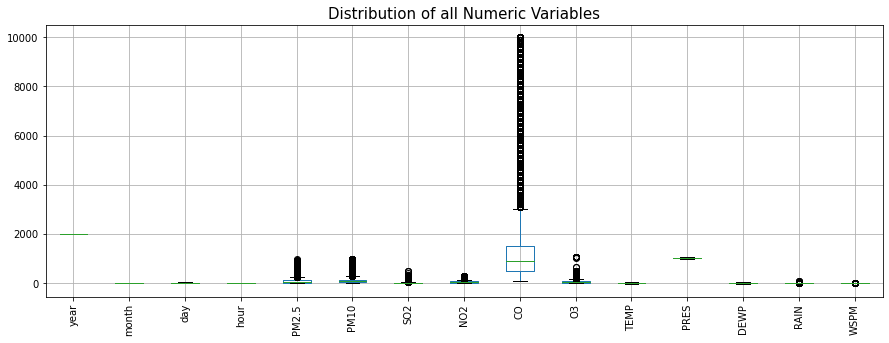

In [ ]:
data = df_AQI.copy()
data = data.select_dtypes(exclude='object')
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,5))

# plot a boxplot to visualize the outliers in all the numeric variables
data.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 10)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that all the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

### Outlier Analyis for individual features.

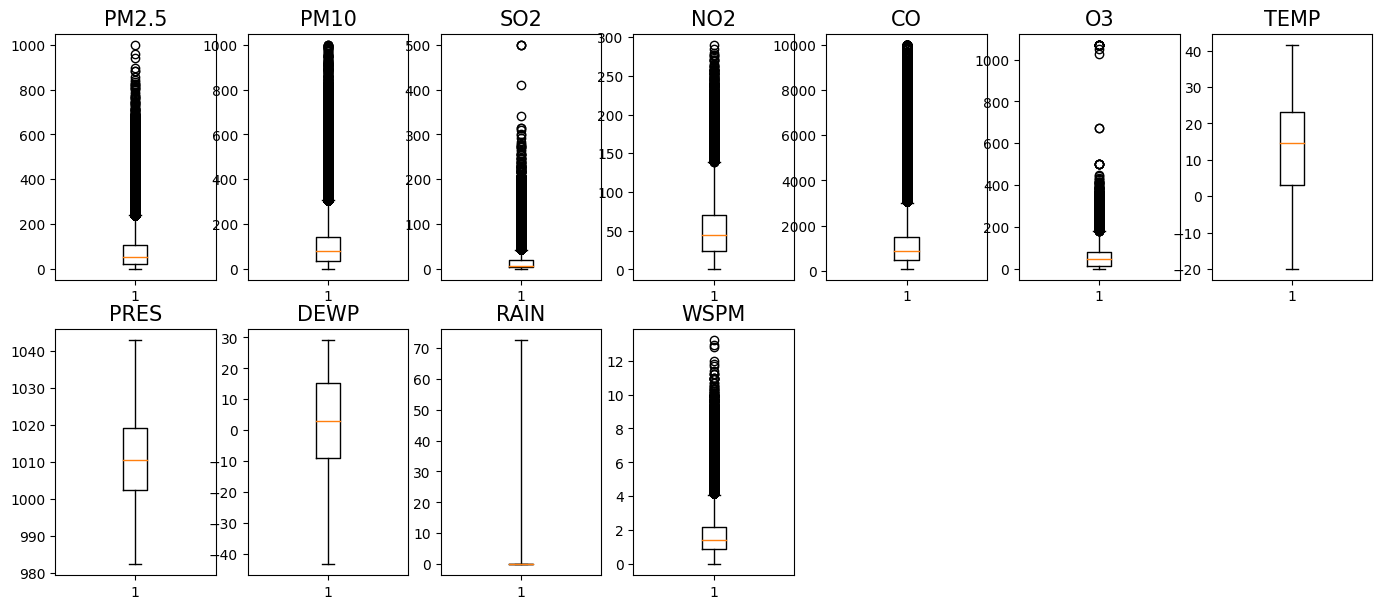

In [ ]:
data = df_AQI.select_dtypes(exclude='object').copy()
data.drop(['month','day','year','hour'],axis=1,inplace=True)
plt.rcParams['figure.dpi'] = 100
outliers_by_variables = data.columns

plt.figure(figsize=(17,15))
for i in range(0,outliers_by_variables.shape[0]):
    plt.subplot(4,7, i+1)
    plt.boxplot(data[outliers_by_variables[i]], autorange=True)
    plt.title(outliers_by_variables[i], fontdict= {'fontsize': 15 ,'fontweight': 5, 'color':'000000'})
    plt.AutoLocator.default_params

#### Outlier Analysis for Target Variable i.e. PM2.5

Skewness of the Target Variable:  2.0479


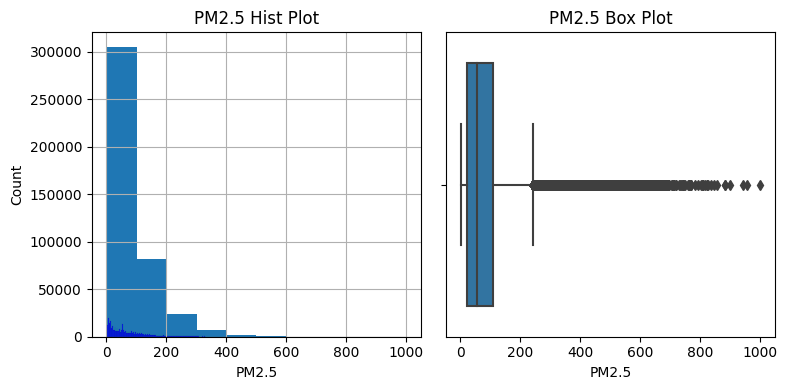

In [ ]:
print("Skewness of the Target Variable: ", round(data['PM2.5'].skew(),4))
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (8,4))
# plot a distplot for the residuals
data['PM2.5'].hist(ax = axes[0])
sns.histplot(data['PM2.5'], ax = axes[0], color='b')
# set text size using 'fontsize'
axes[0].set_title('PM2.5 Hist Plot', fontsize = 12)

# plot the Q-Q plot
# 'r' represents the regression line
sns.boxplot(data['PM2.5'], ax = axes[1],orient="v")
axes[1].set_title('PM2.5 Box Plot', fontsize = 12)
fig.tight_layout()
# display the plot
plt.show()

##### Interpretation of Target variable PM2.5 skewness<br/>
 2.0479 > 0 implies positive skewnesss<br/>
 **Target Variable is Poistively Skewed**

### Correlation between features and ploting Heat map:

Multi-Collinearity Feature:: NO2 &  PM2.5 :-> Correlation Score 0.658
Multi-Collinearity Feature:: NO2 &  CO :-> Correlation Score 0.6869
Multi-Collinearity Feature:: CO &  PM2.5 :-> Correlation Score 0.7672
Multi-Collinearity Feature:: CO &  SO2 :-> Correlation Score 0.5235
Multi-Collinearity Feature:: CO &  NO2 :-> Correlation Score 0.6869
Multi-Collinearity Feature:: TEMP &  O3 :-> Correlation Score 0.5858
Multi-Collinearity Feature:: TEMP &  DEWP :-> Correlation Score 0.8201


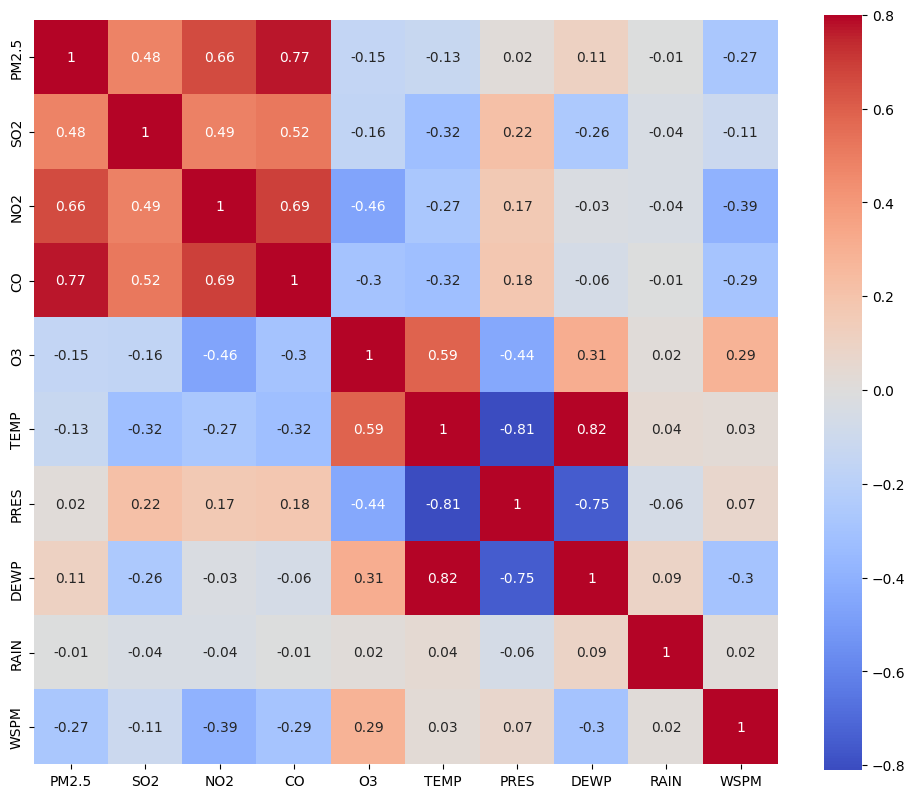

In [ ]:
import seaborn as sns
data = data.drop(['PM10'],axis=1)
corrmat = data.select_dtypes(exclude='object').corr()
f, ax = plt.subplots(figsize=(12, 10))

dupl_key_values = list()
for i in range(len(corrmat.columns)):
  for j in range(len(corrmat.index)):
    if corrmat.iloc[i,j]>0.50 and corrmat.iloc[i,j] != 1.0:
        if i not in dupl_key_values or j in dupl_key_values:
            dupl_key_values.append(j)
        if i in dupl_key_values or j not in dupl_key_values:
            dupl_key_values.append(i)
            print('Multi-Collinearity Feature:: {} &  {} :-> Correlation Score {}'.format(corrmat.columns[i],corrmat.columns[j],round(corrmat.iloc[i,j],4)))

sns.heatmap(round(corrmat, 2), vmax=.8, square=True, annot=True,cmap='coolwarm')

#### Interpretation: Relatively high correlation seen among CO, NO2, SO2 and PM2.5 and also between O3 and temp.

##### #Correlation Score#
1. NO2 &  PM2.5 :-> 0.658
2. Multi-Collinearity Feature:: NO2 &  CO :-> 0.6869
3. Multi-Collinearity Feature:: CO &  PM2.5 :-> 0.7672
4. Multi-Collinearity Feature:: CO &  SO2 :-> 0.5235
5. Multi-Collinearity Feature:: CO &  NO2 :-> 0.6869
6. Multi-Collinearity Feature:: TEMP &  O3 :-> 0.5858
7. Multi-Collinearity Feature:: TEMP &  DEWP :-> 0.8201


**Subsequent models might have high Multicolinearity behavior**

<a id='iqr'></a>
### <b style="color:black">Outliers Treating with IQR</b>

In [ ]:
#Remove outliers from the data set 
#not standard approach
print('Before: Outliers Treating with IQR', data.shape)
df_outlier = data.copy()
# df_outlier.drop(['PM10'], axis=1, inplace=True)
df_outlier  = df_outlier.select_dtypes(exclude ='object')
#1st quantile
q1 = df_outlier.quantile(0.25)

#3rd quantile
q3 = df_outlier.quantile(0.75)

# IQR: The Interquartile Range is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
iqr = q3-q1
# print(IQR)
# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_outlier = df_outlier[~((df_outlier  < (q1-(1.5*iqr))) | (df_outlier  > (q3+(1.5*iqr)))).any(axis=1)]

# check the shape of the data
print('After: Outliers Treating with IQR', df_outlier.shape)

Before: Outliers Treating with IQR (420768, 10)
After: Outliers Treating with IQR (304740, 10)


### Box Plot after Outlier Treating with IQR: 

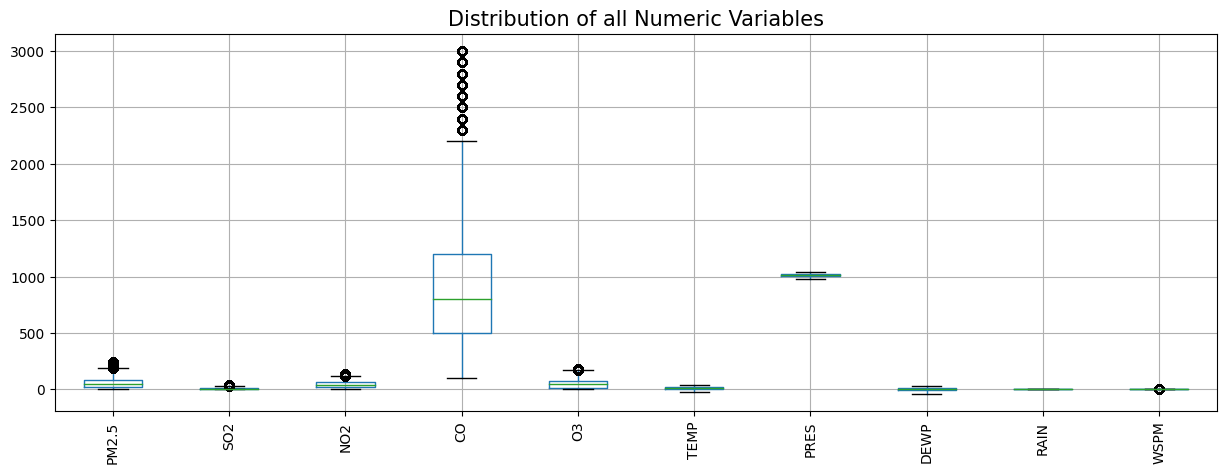

In [ ]:
df_outlier = df_outlier.select_dtypes(exclude='object').copy()
plt.figure(figsize = (15,5))

# plot a boxplot to visualize the outliers in all the numeric variables
df_outlier.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 10)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that all the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

After performing the Outlier analysis and Treated with Upper and lower extremes point we observed CO gas got lesser extrem points, which is higly correlated to increases the PM 2.5

### Individual Feature Analysis using Box Plot after Outlier Treating with IQR:

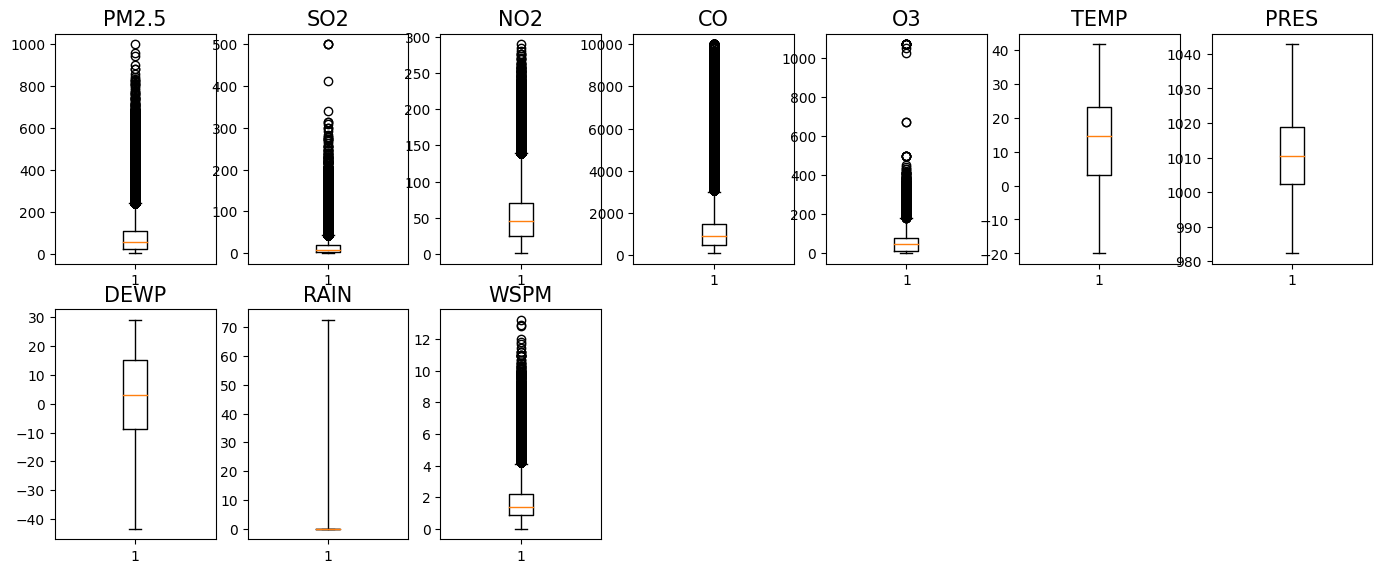

In [ ]:
# df_comp = df_comp.select_dtypes(exclude='object').copy()
plt.rcParams['figure.dpi'] = 100
df_out=df_outlier.copy()
outliers_by_variables = df_out.columns

plt.figure(figsize=(17,14))
for i in range(0,outliers_by_variables.shape[0]):
    plt.subplot(4,7, i+1)
    plt.boxplot(data[outliers_by_variables[i]], autorange=True)
    plt.title(outliers_by_variables[i], fontdict= {'fontsize': 15 ,'fontweight': 5, 'color':'000000'})
    plt.AutoLocator.default_params

**Interpretation:** From the above plots, we notice that all the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.
SO2, NO2, CO , PM2.5, O3 are having the extreme outliers

### Yearly Analysis of Pollutants for each Station

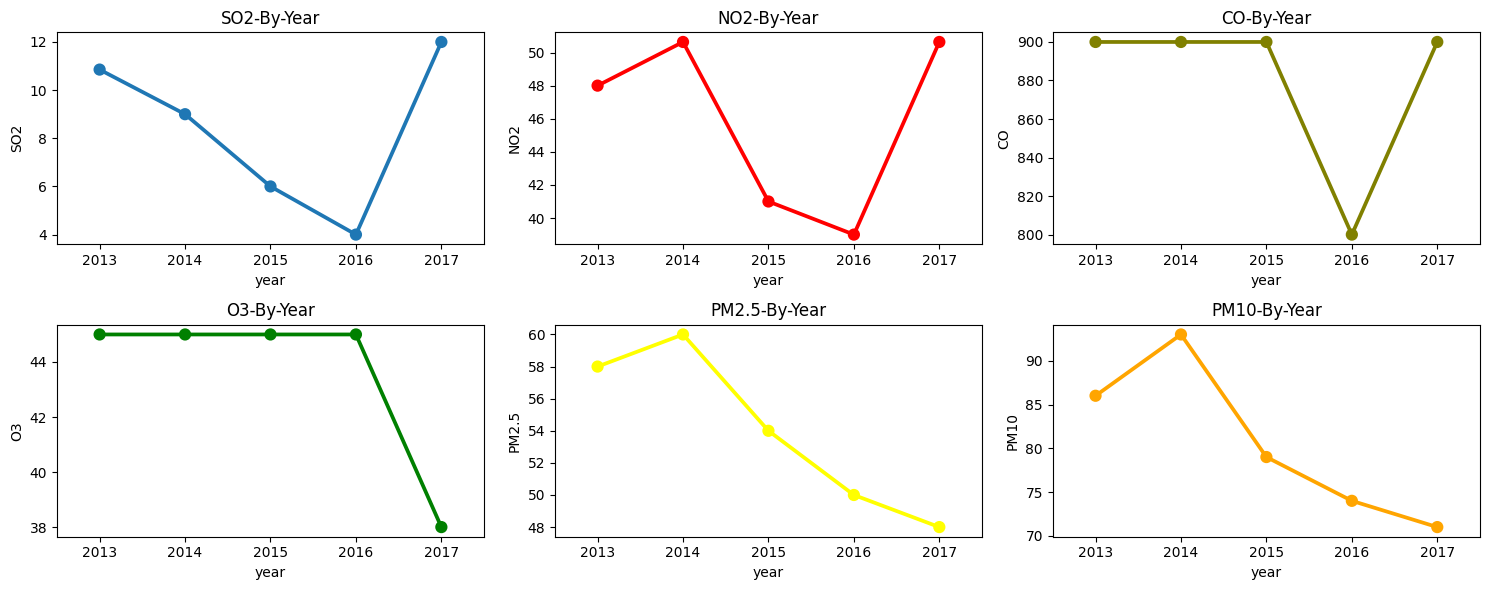

In [ ]:
df = df_AQI[['SO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
fig,ax=plt.subplots(2, 3,figsize=(15,6))
ax[0, 0].set_title('SO2-By-Year')
sns.pointplot(ax= ax[0,0],x='year', y='SO2', data=df)

df = df_AQI[['NO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[0, 1].set_title('NO2-By-Year')
sns.pointplot(ax= ax[0,1], x='year', y='NO2', data=df,markers='o', color='red')

df = df_AQI[['CO','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[0, 2].set_title('CO-By-Year')
sns.pointplot(ax= ax[0,2],x='year', y='CO', data=df,markers='o', color='olive')

df = df_AQI[['O3','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 0].set_title('O3-By-Year')
sns.pointplot(ax=ax[1, 0], x='year', y='O3', data=df,markers='o', color='green')


df = df_AQI[['PM2.5','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 1].set_title('PM2.5-By-Year')
sns.pointplot(ax=ax[1, 1],x='year', y='PM2.5', data=df,markers='o', color='yellow')


df = df_AQI[['PM10','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 2].set_title('PM10-By-Year')
sns.pointplot(ax=ax[1,2], x='year', y='PM10', data=df,markers='o', color='orange')
fig.tight_layout()

### Hourly Analysis of Pollutants in 2017

In [ ]:
df_2017 = df_AQI[df_AQI['year']==2017]

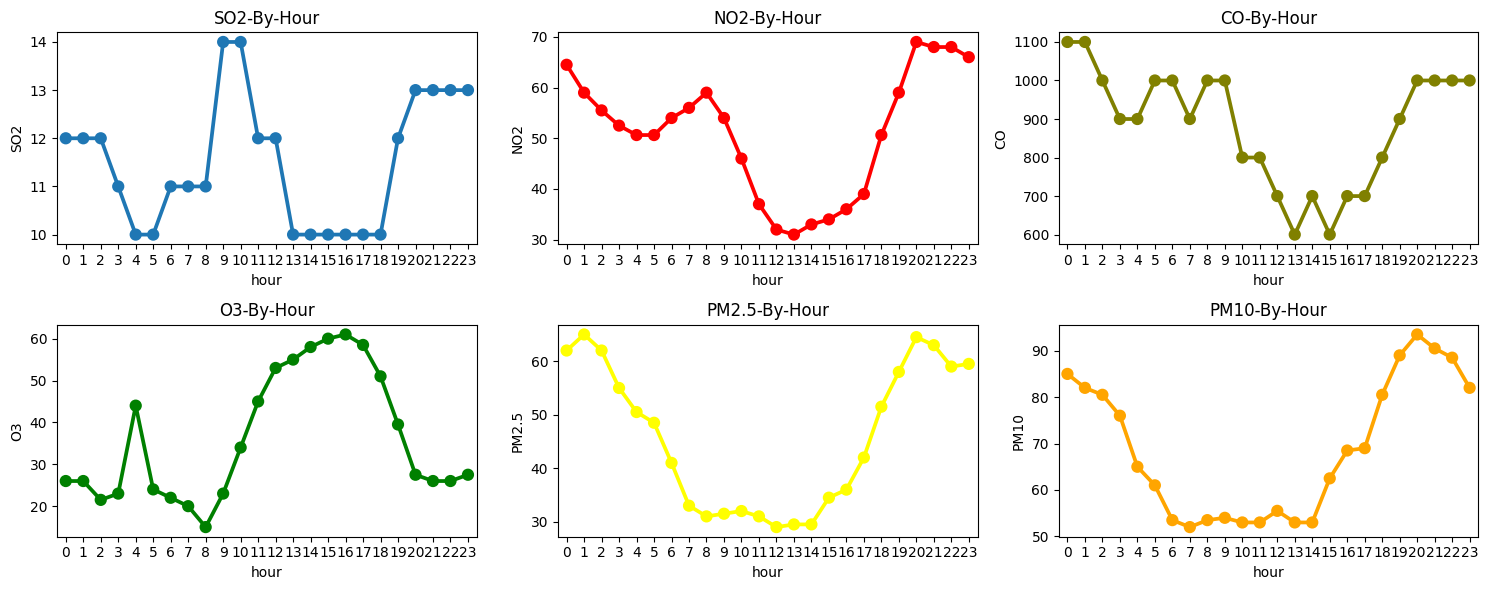

In [ ]:
df = df_2017[['SO2','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
fig,ax=plt.subplots(2, 3, figsize=(15,6))
ax[0, 0].set_title('SO2-By-Hour')
sns.pointplot(ax=ax[0,0],x='hour', y='SO2', data=df)

df = df_2017[['NO2','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[0, 1].set_title('NO2-By-Hour')
sns.pointplot(ax= ax[0,1], x='hour', y='NO2', data=df,markers='o', color='red')

df = df_2017[['CO','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[0, 2].set_title('CO-By-Hour')
sns.pointplot(ax= ax[0,2],x='hour', y='CO', data=df,markers='o', color='olive')

df = df_2017[['O3','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[1, 0].set_title('O3-By-Hour')
sns.pointplot(ax=ax[1, 0], x='hour', y='O3', data=df,markers='o', color='green')

df = df_2017[['PM2.5','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[1, 1].set_title('PM2.5-By-Hour')
sns.pointplot(ax=ax[1, 1],x='hour', y='PM2.5', data=df,markers='o', color='yellow')

df = df_2017[['PM10','hour','station']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
ax[1, 2].set_title('PM10-By-Hour')
sns.pointplot(ax=ax[1,2], x='hour', y='PM10', data=df,markers='o', color='orange')

fig.tight_layout()

**Interpretation:** <br/>

From the above plots:<br/>
The day of busines end hours (9:00 AM to 7:00 PM) we can easily find the Polutant gases contributing more to PM2.5

### Analysis of Pollutants in day of the week

In [ ]:
# creating date field for further analysis by extracting day of the week, month etc.
df_2017['date']=pd.to_datetime(df_2017[['year', 'month', 'day']])

In [ ]:
# function to find day of the week based on the date field
import calendar
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

In [ ]:
df_2017['day_week'] = df_2017['date'].apply(lambda x: findDay(x))

In [ ]:
custom_day = {'Monday':0, 'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

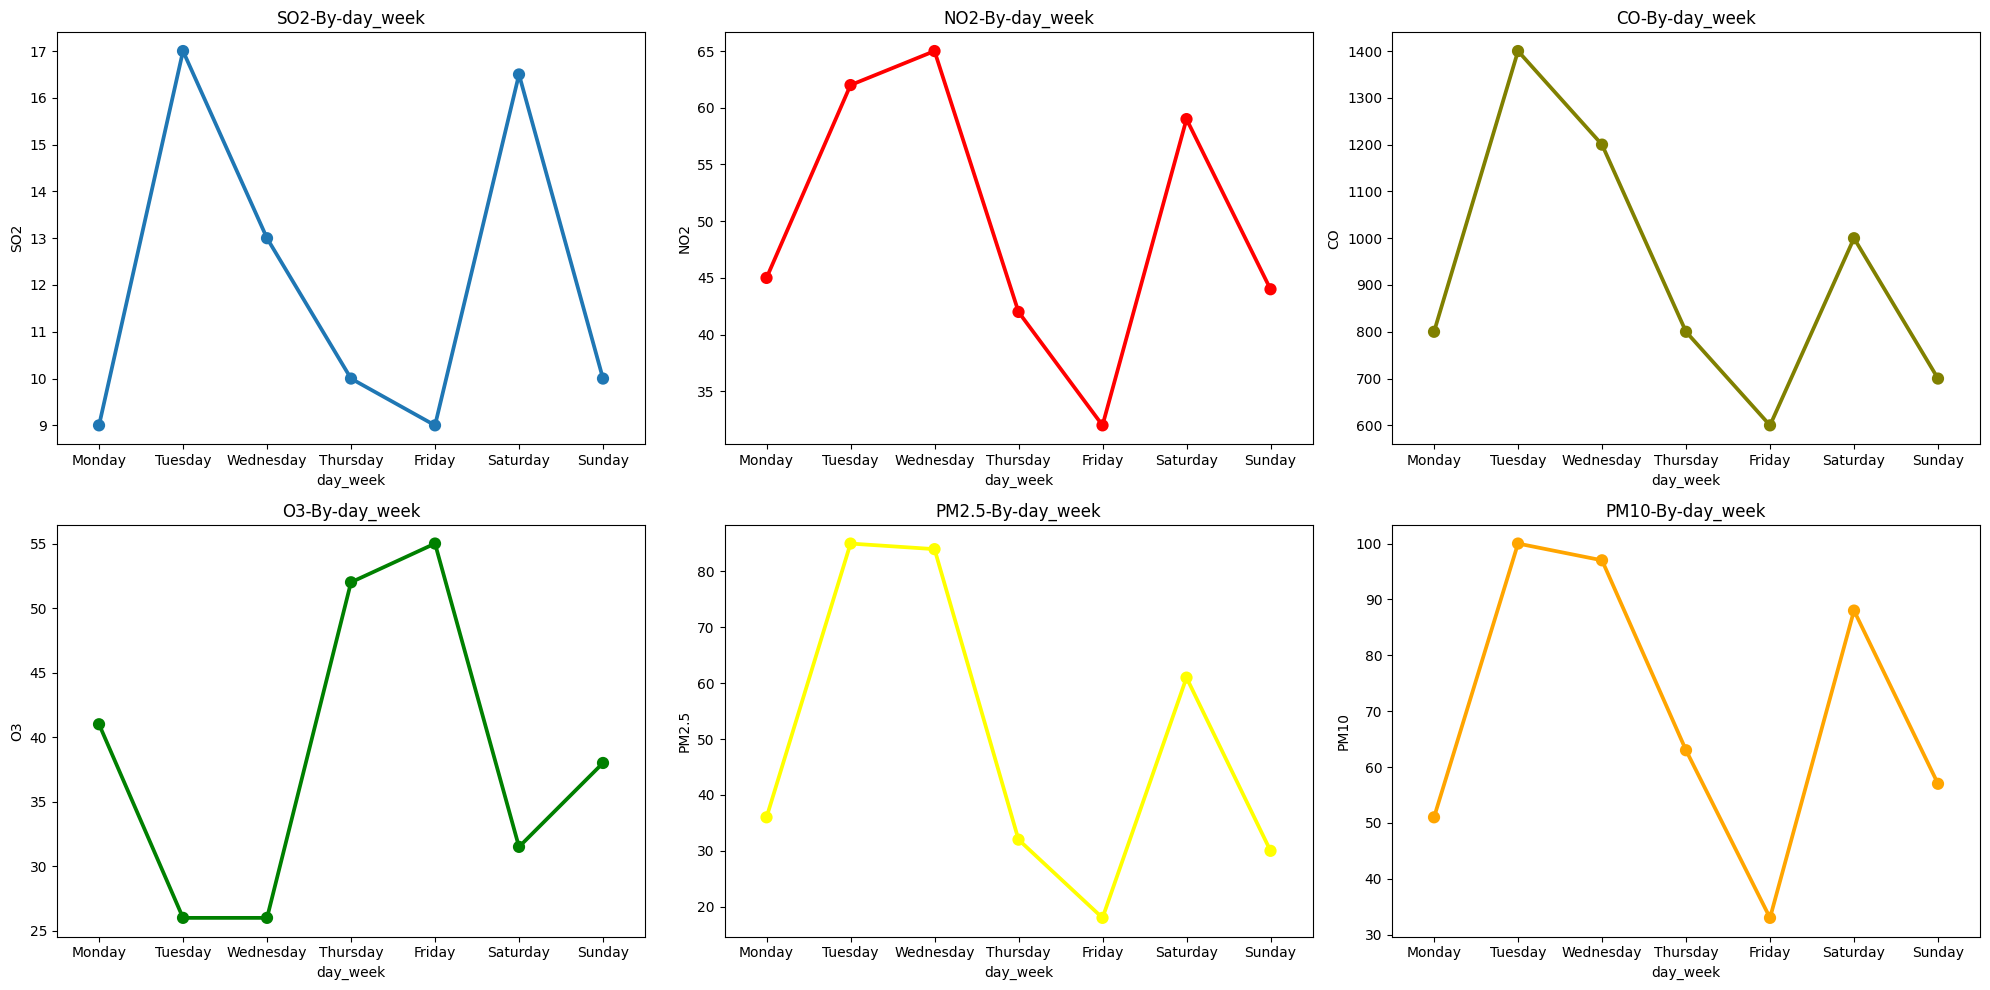

In [ ]:
df = df_2017[['SO2','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
fig,ax=plt.subplots(2,3, figsize=(20,10))
ax[0, 0].set_title('SO2-By-day_week')
sns.pointplot(ax=ax[0,0],x='day_week', y='SO2',markers='o', data=df)

df = df_2017[['NO2','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[0, 1].set_title('NO2-By-day_week')
sns.pointplot(ax= ax[0,1], x='day_week', y='NO2', data=df,markers='o', color='red')

df = df_2017[['CO','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[0, 2].set_title('CO-By-day_week')
sns.pointplot(ax= ax[0,2],x='day_week', y='CO', data=df, color='olive')

df = df_2017[['O3','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[1, 0].set_title('O3-By-day_week')
sns.pointplot(ax=ax[1, 0], x='day_week', y='O3', data=df,markers='o', color='green')

df = df_2017[['PM2.5','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[1, 1].set_title('PM2.5-By-day_week')
sns.pointplot(ax=ax[1, 1],x='day_week', y='PM2.5', data=df,markers='o', color='yellow')

df = df_2017[['PM10','day_week','station']].groupby(["day_week"]).median().reset_index().sort_values(by='day_week',ascending=True)
df = df.iloc[df['day_week'].map(custom_day).argsort()]
ax[1, 2].set_title('PM10-By-day_week')
sns.pointplot(ax=ax[1,2], x='day_week', y='PM10', data=df, markers='o', color='orange')

fig.tight_layout()

**Interpretation:** <br/>

From the above plots:<br/>
During week days Co, NO2, SO2 Polutant gases contributing more to PM2.5

### Analysis of Pollutants month wise wrt to station

In [ ]:
df_mon = df_AQI.copy()
#converting month values to month name for better understanding
df_mon.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace=True)

In [ ]:
#Assign the year to numeric number
custom_dict = {'Jan':0, 'Feb':1,'Mar':2,'Apr':3,'May':4,'Jun':5,'Jul':6,'Aug':7,'Sep':8,'Oct':9,'Nov':10,'Dec':11}

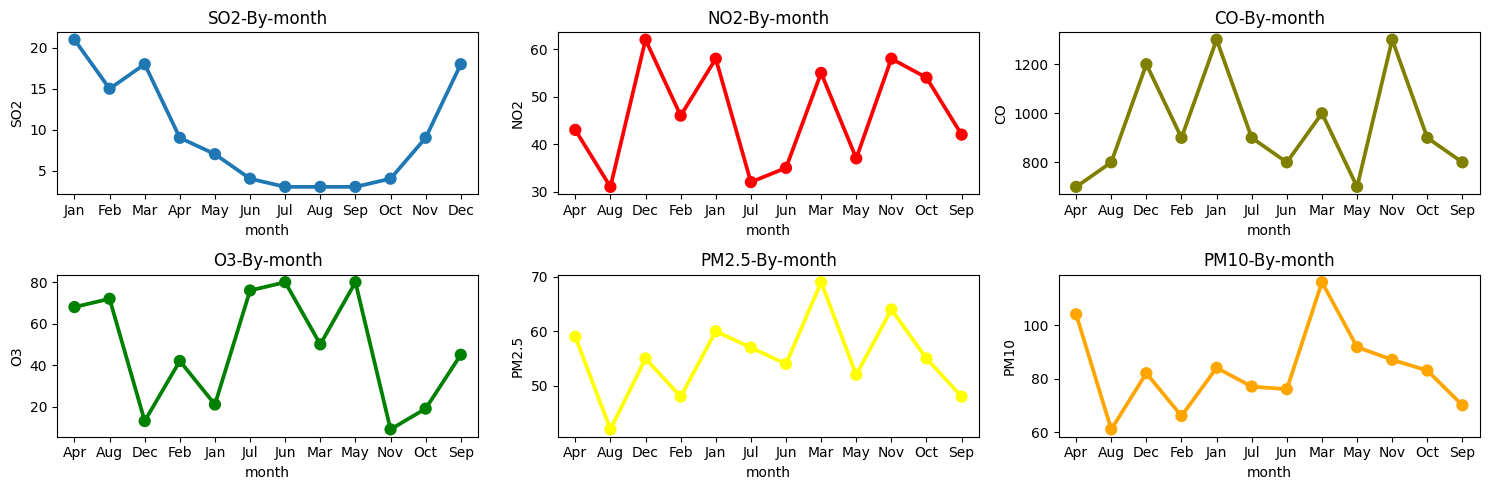

In [ ]:
df = df_mon[['SO2','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
df = df.iloc[df['month'].map(custom_dict).argsort()]
fig,ax=plt.subplots(2,3, figsize=(15,5))
ax[0, 0].set_title('SO2-By-month')
sns.pointplot(ax= ax[0,0], x='month', y='SO2', data=df)

df = df_mon[['NO2','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[0, 1].set_title('NO2-By-month')
sns.pointplot(ax= ax[0,1], x='month', y='NO2', data=df,markers='o', color='red')

df = df_mon[['CO','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[0, 2].set_title('CO-By-month')
sns.pointplot(ax= ax[0,2],x='month', y='CO', data=df,markers='o', color='olive')

df = df_mon[['O3','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[1, 0].set_title('O3-By-month')
sns.pointplot(ax=ax[1, 0], x='month', y='O3', data=df,markers='o', color='green')

df = df_mon[['PM2.5','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[1, 1].set_title('PM2.5-By-month')
sns.pointplot(ax=ax[1, 1],x='month', y='PM2.5', data=df,markers='o', color='yellow')

df = df_mon[['PM10','month','station']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=True)
ax[1, 2].set_title('PM10-By-month')
sns.pointplot(ax=ax[1,2], x='month', y='PM10', data=df,markers='o', color='orange')

fig.tight_layout()

<a id='outlier_station'></a>
### <b style="color:black">Outlier Analyis for Different types of Pollutant Gas With respect to Station</b>

<a id='PM2.5'></a>
##### <b style="color:black">PM2.5 Target variable Outlier Analysis wrt station</b>

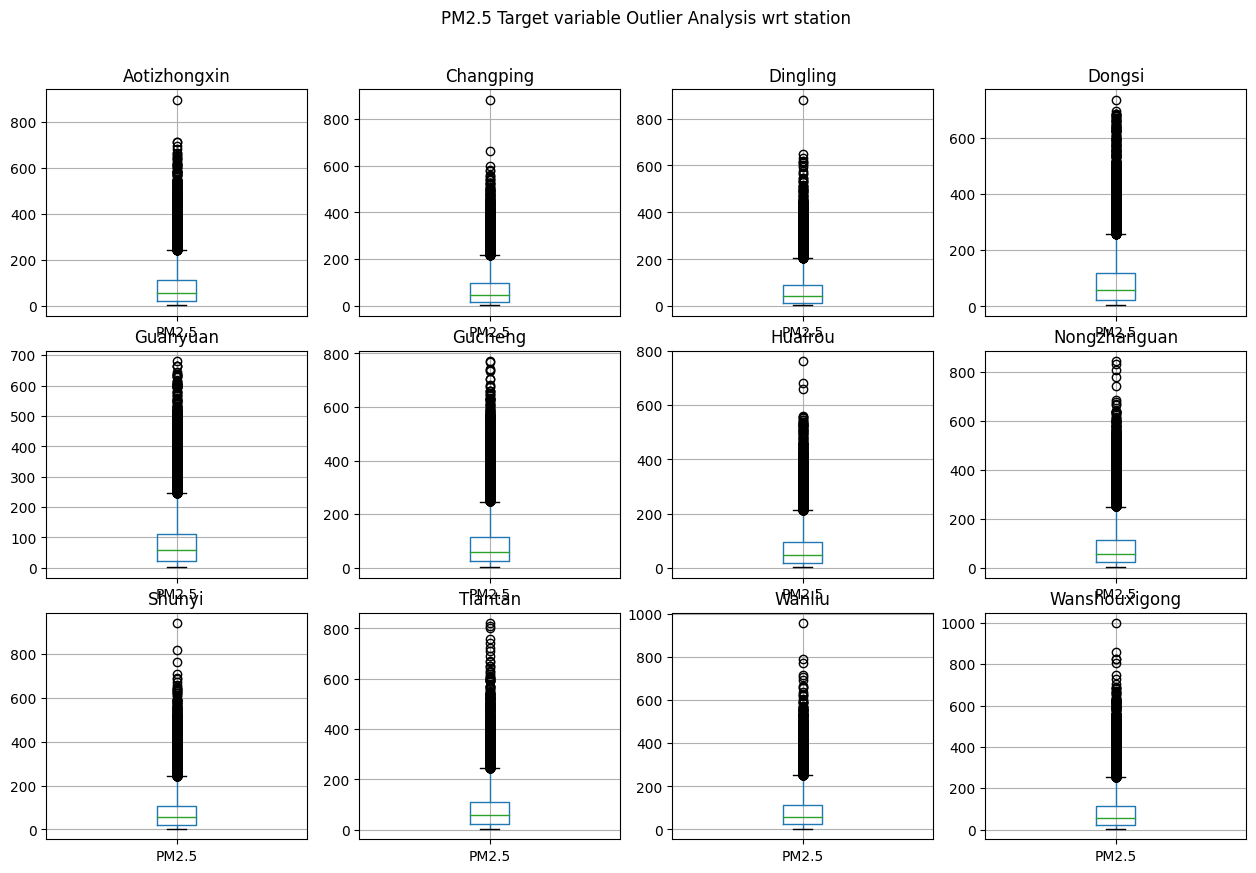

In [ ]:
pm2_out = df_AQI[['station', 'PM2.5']]
fig,ax=plt.subplots(3,4, figsize=(15,10))
fig.tight_layout()
pm2_out.groupby('station').boxplot(ax=ax)
plt.suptitle('PM2.5 Target variable Outlier Analysis wrt station')
plt.show()

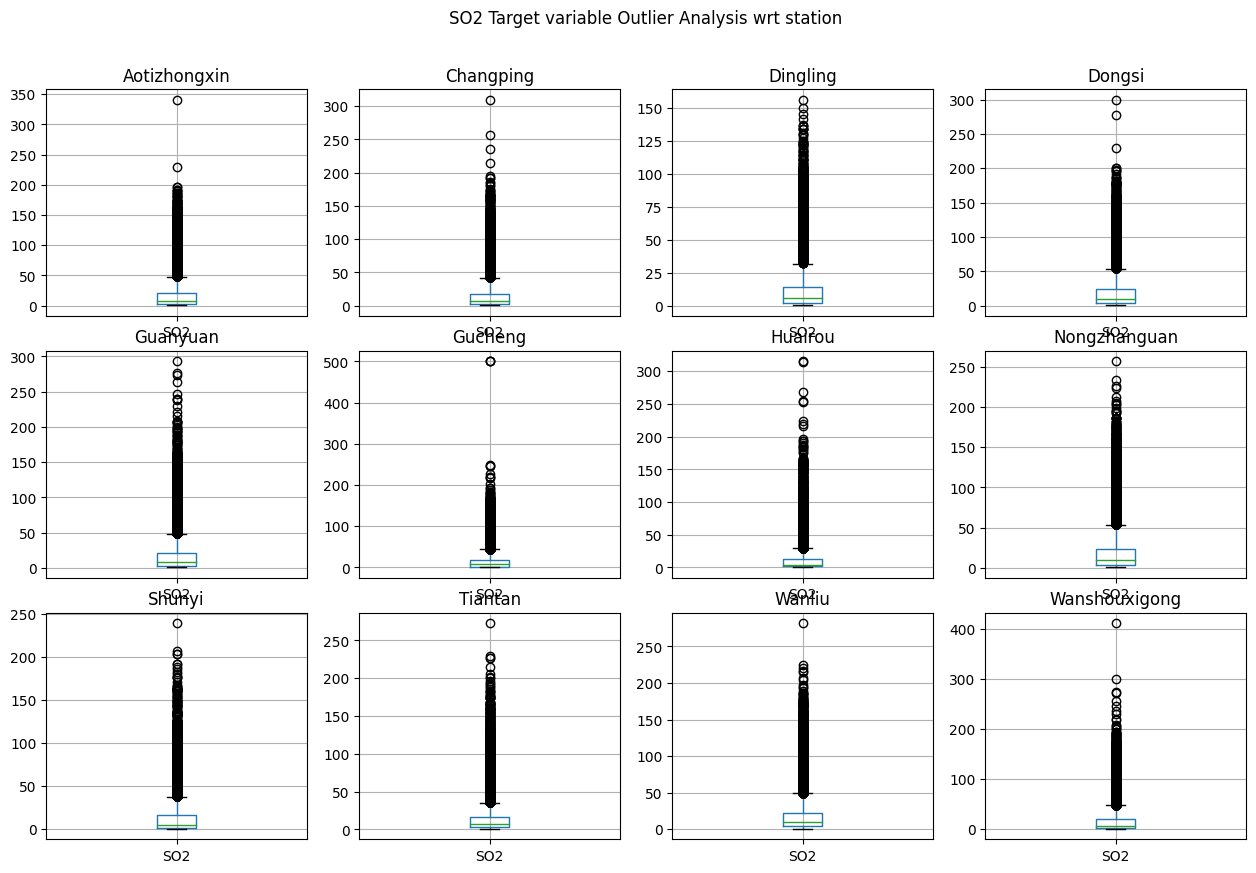

In [ ]:
df_so2_sta = df_AQI[['station', 'SO2', 'PM2.5']]
fig,ax=plt.subplots(3,4, figsize=(15,10))
fig.tight_layout()
df_so2_sta.groupby('station').boxplot(ax=ax, column='SO2')
plt.suptitle('SO2 Target variable Outlier Analysis wrt station')
plt.show()

<a id='NO2'></a>
##### <b style="color:black">NO2 Outlier Analysis</b>

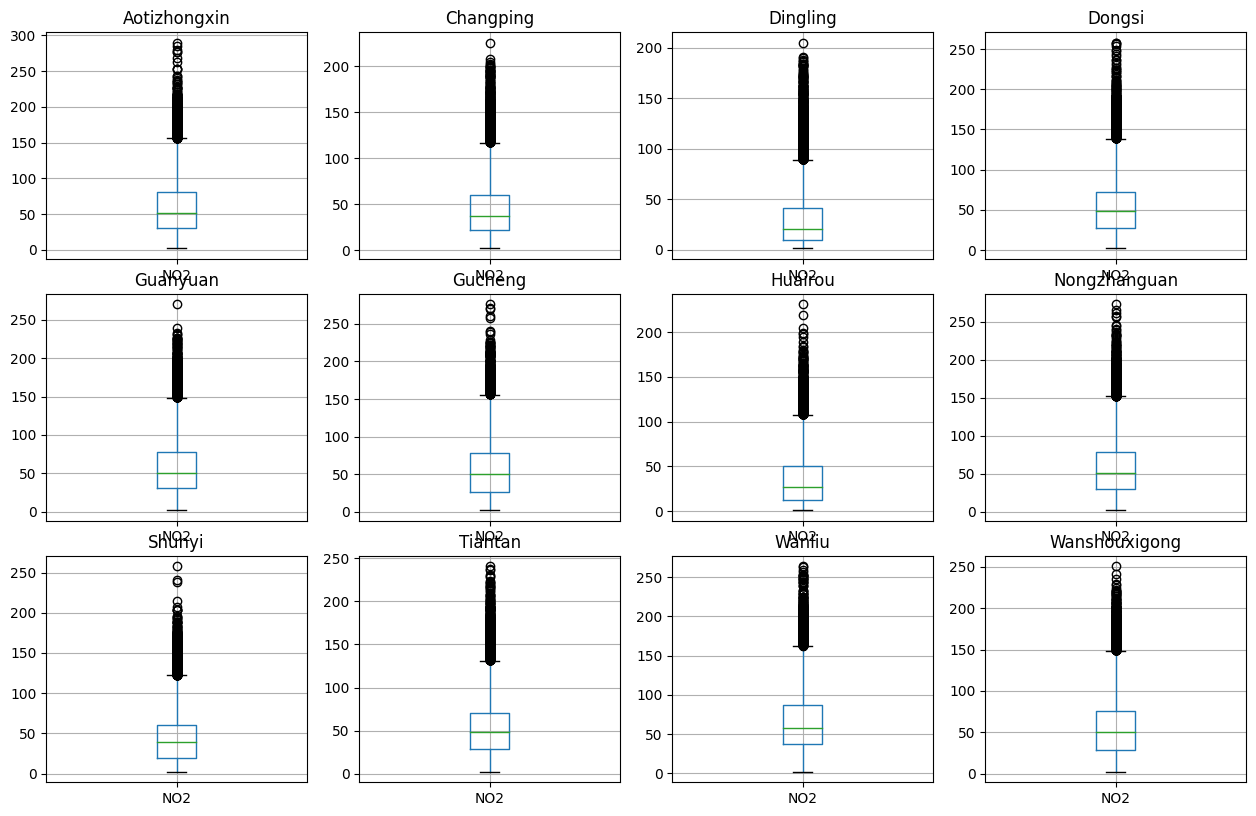

In [ ]:
df_No2_sta = df_AQI[['station', 'NO2']]
fig,ax=plt.subplots(3,4, figsize=(15,10))
fig.tight_layout()
df_No2_sta.groupby('station').boxplot(ax=ax, column='NO2')
plt.show()

<a id='CO'></a>
##### <b style="color:black">CO Outlier Analysis</b>

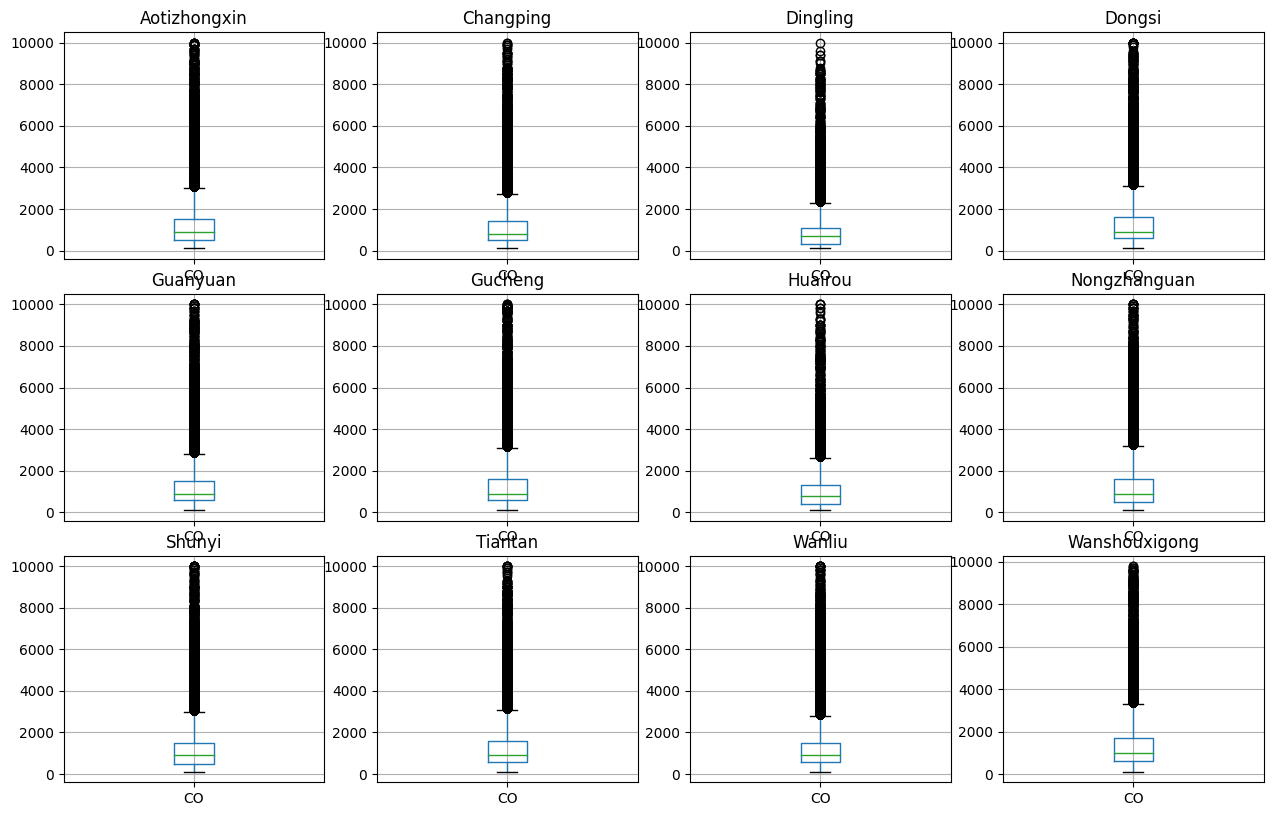

In [ ]:
df_Co_sta = df_AQI[['station', 'CO']]
fig,ax=plt.subplots(3,4, figsize=(15,10))
fig.tight_layout()
df_Co_sta.groupby('station').boxplot(ax=ax, column='CO')
plt.show()

<a id='O3'></a>
##### <b style="color:black">O3 Outlier Analysis</b>

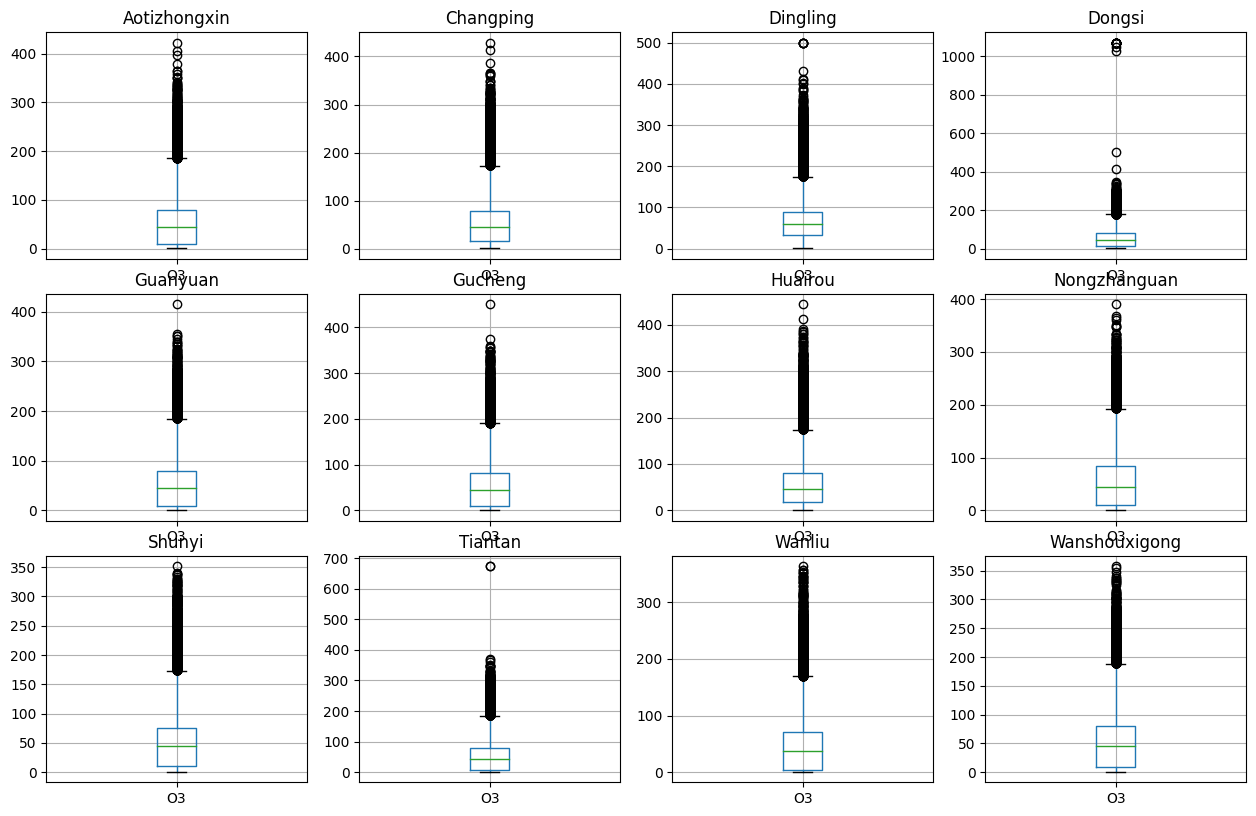

In [ ]:
df_o3_sta = df_AQI[['station', 'O3']]
fig,ax=plt.subplots(3,4, figsize=(15,10))
fig.tight_layout()
df_o3_sta.groupby('station').boxplot(ax=ax, column='O3')
plt.show()

### Thats the end for EDA, in the next IPython Notebooks, we will be focussing on model building.